In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 설치된 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# 1번

### 데이터 세트 불러오기

In [3]:
df = pd.read_csv('armybody.csv',encoding='cp949')
df.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


### 1-1. 데이터 세트의 shpae 출력하기

In [4]:
df.shape

(135670, 10)

In [5]:
df.describe()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
count,135670.000000,1.356700e+05,135669.000000,135670.000000,135670.000000,135670.000000,135670.000000,135670.000000,135670.000000,135670.000000
mean,67835.500000,9.248271e+06,95.607562,87.317983,174.710975,86.402233,79.300615,58.011239,26.817474,72.134245
std,39164.699848,1.004150e+07,9.115908,2.740293,5.454907,11.278585,3.761268,1.940504,1.349922,13.758051
min,1.000000,2.013000e+03,75.000000,77.100000,153.600000,41.300000,5.900000,52.000000,20.600000,40.100000
25%,33918.250000,2.013000e+03,88.900000,85.400000,170.900000,78.000000,76.700000,56.700000,25.900000,62.100000
50%,67835.500000,2.014000e+03,94.500000,87.300000,174.600000,84.900000,78.900000,57.900000,26.800000,70.100000
75%,101752.750000,2.016020e+07,101.200000,89.100000,178.300000,93.300000,81.600000,59.300000,27.600000,80.100000
max,135670.000000,2.016070e+07,137.700000,99.600000,198.400000,160.000000,103.700000,63.900000,34.200000,135.000000


### 1-2 신장 소매길이 데이터 시각화
>* 신장(x)에 따른 소매(y)값을 출력하는것이므로 scatter 사용
>* plt.scatter 사용해도 되는데, DataFrame형태일 때는 seaborn이 더 간편

In [6]:
tmp_df = df.sample(frac=0.01)
tmp_df.shape

(1357, 10)

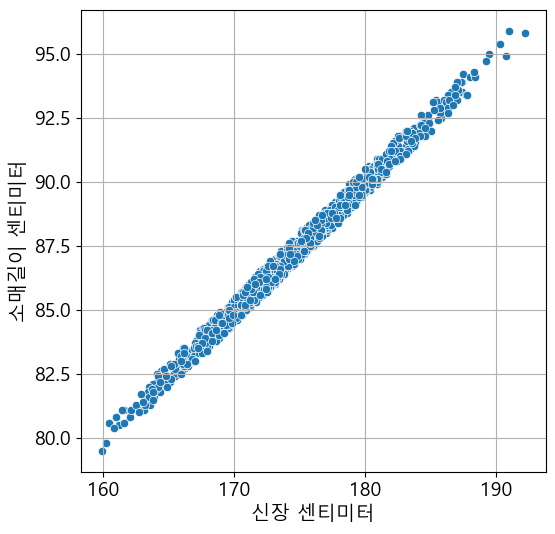

In [7]:
# seaborn 사용하기

sns.scatterplot(data=tmp_df,x='신장 센티미터',y='소매길이 센티미터')
plt.show()

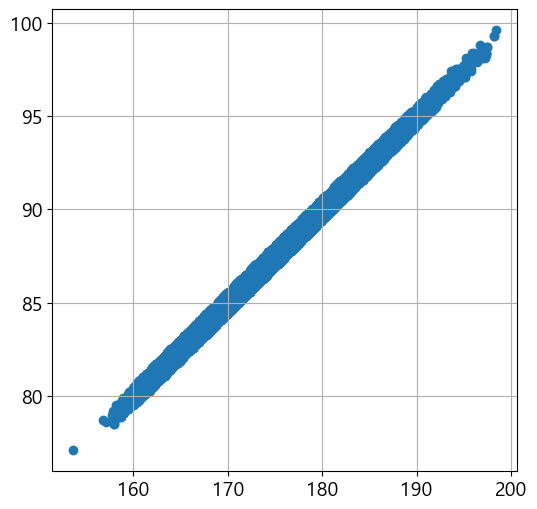

In [8]:
# plt 사용하기

plt.scatter(df['신장 센티미터'],df['소매길이 센티미터'])
plt.show()

### 1-3. 데이터 세트 나누기

>* 직접 나눠도 되지만, train_test_split이라는 매우 좋은 도구가 존재

In [9]:
from sklearn.model_selection import train_test_split


train,test = train_test_split(df, train_size=100000, random_state=42)

# # tail은 뒤에서부터 출력, tail(1)이니까 뒤에서부터 1개 출력하겠다는 뜻
train.tail(1)

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
121958,121959,20160509,90.7,84.3,169.3,76.3,75.8,58.3,27.9,60.2


In [10]:
train.tail(1)

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
121958,121959,20160509,90.7,84.3,169.3,76.3,75.8,58.3,27.9,60.2


In [11]:
test.tail(1)

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
53690,53691,2013,92.2,92.9,185.8,75.6,82.1,58.2,27.7,73.7


### 1-4. 선형 회귀 모델 설계
>* 쉽게 생각하면 Y=WX+B형태의 모델을 만들라는 뜻!
>* 신장(X,특징1개)에 대한 소매길이를 구하는 것이므로 Linear(1,1)로 설계

In [12]:
class MyModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,1)
    def forward(self,x):
        output = self.l1(x)
        return output

모델 요약 및 파라미터

In [13]:
model = MyModel1()
summary(model)

Layer (type:depth-idx)                   Param #
MyModel1                                 --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

### 학습을 위해 데이터를 tensor로 바꾸고, 차원도 바꿔준다
>* 현재는 (1,100000)의 형태
>* (100000,1)의 형태로 바꿔줘야 Linear(1,1)과 계산이 가능하다

In [14]:
torch.tensor(train['신장 센티미터'].tolist()).reshape(-1,1).shape

torch.Size([100000, 1])

In [15]:
train_x = torch.tensor(train['신장 센티미터'].tolist()).reshape(-1,1)
train_y = torch.tensor(train['소매길이 센티미터'].tolist()).reshape(-1,1)
test_x = torch.tensor(test['신장 센티미터'].tolist()).reshape(-1,1)
test_y = torch.tensor(test['소매길이 센티미터'].tolist()).reshape(-1,1)

# 데이터 정규화
train_x -=train_x.mean()
train_y -= train_y.mean()
test_x -=test_x.mean()
test_y -= test_y.mean()

### 하이퍼 파라미터 설정
>* epochs: 학습 횟수
>* lr: 학습률
>* L1Loss(loss function): MAE(mean absolute error)
>* SGD(optimzer function): Stochastic Gradient Descent

In [16]:
epochs = 100
lr= 0.01

loss_function = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=lr)

### 1-5. 학습 및 손실 그래프 그리기

In [17]:
loss_epoch = {'train':[],'test':[]}

for epoch in range(epochs):
    
    # model.train()을 해주면 '학습모드'로 전환
    model.train()
    
    # 예측
    outputs = model(train_x)
    
    # 손실 계산
    loss = loss_function(outputs,train_y)
    
    # 그래디언트 계산
    loss.backward()
    
    # 이동
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            # model.eval()을 해주면 '평가모드'로 전환
            model.eval()
            outputs = model(test_x)
            test_loss = loss_function(outputs,test_y)
            loss_epoch['test'].append(test_loss.item())
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        loss_epoch['train'].append(loss.item())

Epoch [10/100], Loss: 0.8372
Epoch [20/100], Loss: 0.7219
Epoch [30/100], Loss: 0.6225
Epoch [40/100], Loss: 0.5244
Epoch [50/100], Loss: 0.4400
Epoch [60/100], Loss: 0.3771
Epoch [70/100], Loss: 0.3298
Epoch [80/100], Loss: 0.2976
Epoch [90/100], Loss: 0.2761
Epoch [100/100], Loss: 0.2624


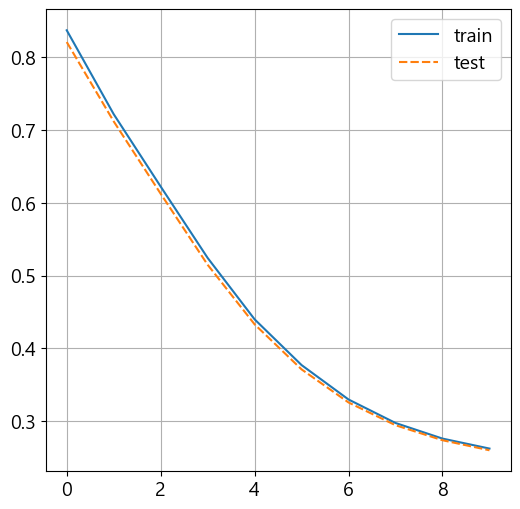

In [18]:
sns.lineplot(loss_epoch)
plt.show()

In [19]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[0.4998]], requires_grad=True),
   Parameter containing:
   tensor([0.1385], requires_grad=True)],
  'lr': 0.01,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False,
  'fused': None}]

# 2번

### 데이터 생성하기

In [20]:
np.random.seed(123)
x= np.random.randn(100,1)
y = x**2+np.random.randn(100,1)*0.1

### 2-1. 데이터 가시화하기
>* 1-2번과 마찬가지로 scatter로 출력하면 됨

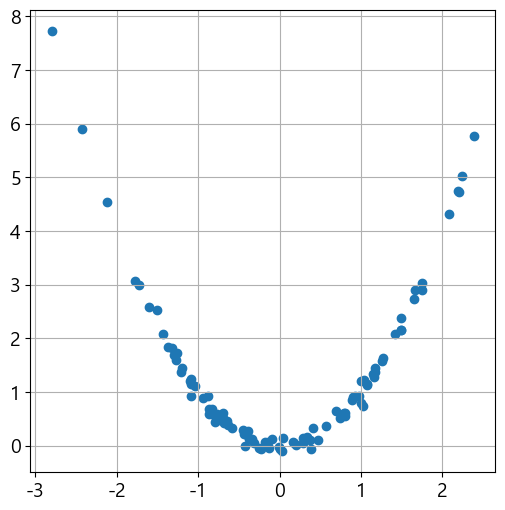

In [21]:
plt.scatter(x,y)
plt.show()

데이터: 100x1


l1: 1x10
h1: 100x10

l2: 10x5
h2: 100x5

l3: 5x10
h3: 100x10

l4: 10x1

output: 100x1

In [22]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,10)
        self.l2 = nn.Linear(10,5)
        self.l3 = nn.Linear(5,10)
        self.l4 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        h1 = self.l1(x)
        h2 = self.relu(self.l2(h1))
        h3 = self.relu(self.l3(h2))
        output = self.relu(self.l4(h3))
        return output

In [23]:
model = MyModel2()
for param in model.parameters():
    print(param.dtype)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


In [24]:
summary(model)

Layer (type:depth-idx)                   Param #
MyModel2                                 --
├─Linear: 1-1                            20
├─Linear: 1-2                            55
├─Linear: 1-3                            60
├─Linear: 1-4                            11
├─ReLU: 1-5                              --
Total params: 146
Trainable params: 146
Non-trainable params: 0

### torch의 dtype이 달라서 에러가 발생하여, torch.float32로 dtype 명시

In [25]:
x = torch.tensor(x,dtype=torch.float32)
y  = torch.tensor(y,dtype=torch.float32)

### 2-3. 학습 및 손실그래프 출력

In [26]:
epochs = 100
lr= 0.01

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=lr)

In [27]:
loss_epoch = {'train':[]}

for epoch in range(epochs):
    
    model.train()
    
    outputs = model(x)
    
    loss = loss_function(outputs,y)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        loss_epoch['train'].append(loss.item())

Epoch [10/100], Loss: 3.8241
Epoch [20/100], Loss: 3.8241
Epoch [30/100], Loss: 3.8241
Epoch [40/100], Loss: 3.8241
Epoch [50/100], Loss: 3.8241
Epoch [60/100], Loss: 3.8241
Epoch [70/100], Loss: 3.8241
Epoch [80/100], Loss: 3.8241
Epoch [90/100], Loss: 3.8241
Epoch [100/100], Loss: 3.8241


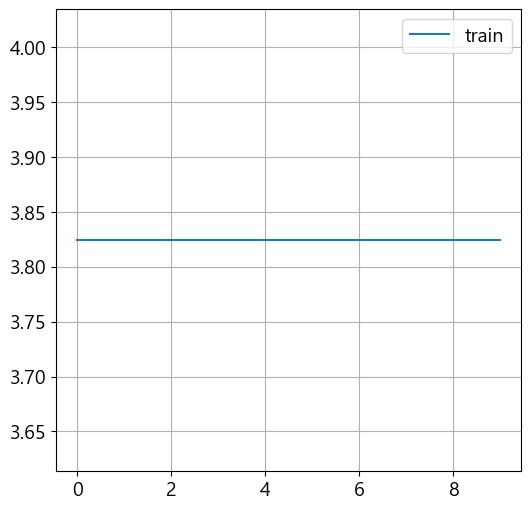

In [28]:
sns.lineplot(loss_epoch)
plt.show()

# 3. CNN 모델 설계

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


위 문법은 파이썬의 삼중연산자임

>* 예를들어 1,0을 랜덤하게 생성할 때, 1이면 yes, 0이면 no를 할당하도록 코드 작성하면 다음과 같다

In [30]:
for _ in range(10):
    print('yes' if np.random.randint(2)==1 else 'no')


yes
no
yes
no
no
no
no
yes
yes
yes


In [31]:
data_root = './data'

# 샘플 손글씨 숫자 데이터 가져오기
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_set = datasets.FashionMNIST(
    root = data_root,  train = True,  
    download = True, transform = transform)

test_set = datasets.FashionMNIST(
    root = data_root,  train = False,  
    download = True, transform = transform)

100%|██████████████████████████████████████████████████████████████████| 26421880/26421880 [04:14<00:00, 103856.55it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Using downloaded and verified file: ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



### FashionMNIST 데이터셋은 (data, label)의 튜플 형태
>* data: 이미지의 정보를 가지고 있음 (channel, width, height)형태
>* label: 이미지의 레이블 정보를 가지고 있음

In [32]:
last_train_data = train_set[-1]
last_test_data = test_set[-1]

In [33]:
last_train_data[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [34]:
print(f'Data:{last_train_data[0].shape}, Label:{last_test_data[1]}')

Data:torch.Size([1, 28, 28]), Label:5


>* 이 말은 채널 1개(보통 1이면 흑백, 3이면 RGB임)에 28x28 픽셀로 구성된 이미지라는 뜻
>* 안에있는 데이터는 0부터 1까지의 값을 가지고 있음
>* 0이면 black, 1이면 white (반대일수도있음, 데이터마다 다름)

### 3-1. 학습 세트 마지막 데이터 이미지 출력

Label:5


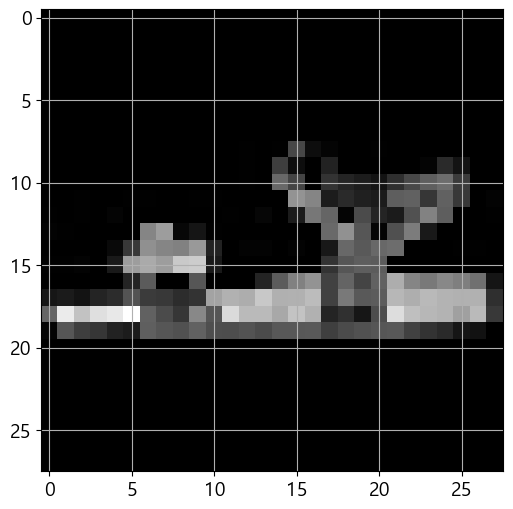

In [35]:
plt.imshow(last_train_data[0].reshape(28,28),cmap='gray')
print( f'Label:{last_train_data[1]}')

### 3-2. 테스트 세트 마지막 데이터 이미지 출력

Label:5


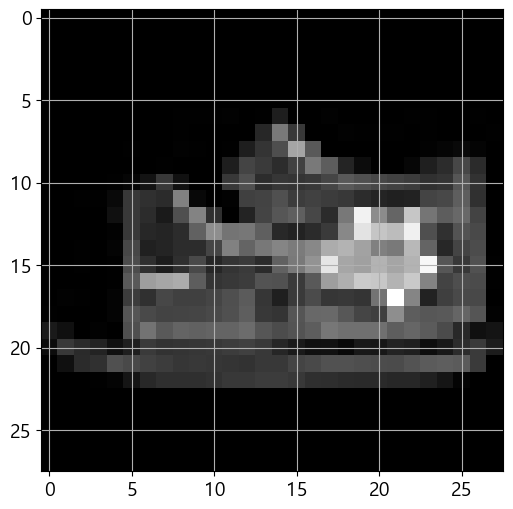

In [36]:
plt.imshow(last_test_data[0].reshape(28,28),cmap='gray')
print( f'Label:{last_test_data[1]}')

# 코드는 처음부터 다 짜는게 아니다!!
>* 코딩할때 제일 중요한 스킬은 ctrl+c, ctrl+v
>* 대신 어떤식으로 동작하는지는 알아야함

In [37]:
# 정확도 계산용
def eval_acc(loader, device, net, criterion):
    
    val_acc=0
    count = 0
    
    # 데이터로더에서 처음 한 개 세트를 가져옴
    for images, labels in loader:
        count+=len(labels)
        # 디바이스 할당
        inputs = images.to(device)
        labels = labels.to(device)

        # 예측 계산
        outputs = net(inputs)

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 정답 건수 산출
        val_acc += (predicted == labels).sum().item()

    avg_val_acc = val_acc / count

    return avg_val_acc

In [38]:
# 학습용 함수
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdm 라이브러리 임포트
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 훈련 페이즈
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 경사 초기화
            optimizer.zero_grad()

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 경사 계산
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            train_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답 건수 산출
            val_acc += (predicted == labels).sum().item()

            # 손실과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history

In [39]:
# 학습 로그 해석

def evaluate_history(history):
    # 손실과 정확도 확인
    print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}') 
    print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

    num_epochs = len(history)
    unit = num_epochs / 10

    # 학습 곡선 출력(손실)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,1], 'b', label='훈련')
    plt.plot(history[:,0], history[:,3], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1, unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('손실')
    plt.title('학습 곡선(손실)')
    plt.legend()
    plt.show()

    # 학습 곡선 출력(정확도)
    plt.figure(figsize=(9,8))
    plt.plot(history[:,0], history[:,2], 'b', label='훈련')
    plt.plot(history[:,0], history[:,4], 'k', label='검증')
    plt.xticks(np.arange(0,num_epochs+1,unit))
    plt.xlabel('반복 횟수')
    plt.ylabel('정확도')
    plt.title('학습 곡선(정확도)')
    plt.legend()
    plt.show()

### 배치 사이즈를 정하는 이유
>* 배치단위로 학습을 하기위해서 -> 여러 장점이 있음
>* 배치 단위로 돌리면 GPU 효을 높일 수 있음
>* 배치 단위로 그래디언트 계산하면 일반화가 잘됨 등등

In [40]:
# 미니 배치 사이즈 지정
batch_size = 100

# 훈련용 데이터로더
# 훈련용이므로 셔플을 True로 설정
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

# 검증용 데이터로더
# 검증용이므로 셔플하지 않음
test_loader = DataLoader(test_set,  batch_size=batch_size, shuffle=False) 

In [41]:
for train,label in train_loader:
    print(train.shape)
    print(label)

torch.Size([100, 1, 28, 28])
tensor([8, 3, 9, 8, 1, 3, 7, 9, 9, 2, 3, 0, 5, 8, 2, 7, 8, 0, 7, 7, 5, 2, 5, 4,
        2, 4, 4, 6, 1, 4, 7, 2, 7, 3, 8, 3, 4, 8, 8, 3, 3, 7, 7, 8, 2, 9, 3, 5,
        5, 2, 7, 7, 6, 1, 2, 8, 7, 9, 8, 9, 9, 1, 9, 9, 2, 8, 8, 5, 6, 4, 5, 5,
        1, 4, 7, 4, 5, 1, 9, 4, 1, 7, 1, 0, 5, 5, 2, 5, 9, 9, 3, 5, 4, 9, 0, 3,
        3, 8, 8, 5])
torch.Size([100, 1, 28, 28])
tensor([1, 5, 3, 4, 6, 5, 9, 8, 4, 7, 0, 3, 9, 6, 2, 4, 1, 4, 7, 8, 0, 5, 1, 6,
        9, 5, 9, 1, 7, 5, 3, 3, 7, 3, 3, 6, 8, 6, 3, 1, 7, 5, 5, 0, 1, 1, 2, 2,
        6, 5, 6, 3, 9, 6, 1, 5, 1, 1, 2, 3, 5, 4, 5, 1, 2, 5, 0, 5, 9, 1, 5, 6,
        1, 1, 4, 4, 3, 3, 8, 0, 3, 7, 2, 8, 8, 8, 3, 6, 3, 6, 5, 3, 5, 1, 2, 2,
        6, 0, 7, 3])
torch.Size([100, 1, 28, 28])
tensor([9, 4, 3, 6, 2, 5, 4, 6, 9, 8, 1, 1, 3, 9, 1, 7, 2, 1, 0, 7, 0, 5, 1, 0,
        5, 0, 8, 7, 3, 7, 7, 6, 0, 0, 1, 5, 7, 2, 1, 2, 7, 3, 6, 6, 4, 1, 7, 8,
        6, 5, 5, 2, 9, 5, 7, 7, 6, 5, 1, 0, 0, 4, 3, 1, 9, 5, 1, 2, 0, 

torch.Size([100, 1, 28, 28])
tensor([8, 3, 0, 6, 1, 7, 8, 1, 2, 3, 5, 5, 6, 5, 1, 3, 9, 0, 1, 2, 7, 8, 7, 3,
        3, 3, 1, 0, 4, 8, 1, 2, 1, 2, 2, 9, 0, 3, 9, 2, 8, 5, 7, 1, 8, 3, 8, 8,
        8, 8, 1, 4, 3, 4, 3, 0, 9, 0, 4, 6, 9, 3, 7, 5, 9, 2, 0, 6, 5, 0, 5, 4,
        2, 1, 1, 2, 5, 1, 0, 0, 4, 1, 9, 2, 1, 6, 2, 2, 7, 2, 6, 2, 6, 0, 5, 1,
        1, 2, 3, 6])
torch.Size([100, 1, 28, 28])
tensor([4, 1, 2, 9, 3, 2, 6, 8, 3, 1, 6, 9, 9, 3, 1, 9, 9, 4, 7, 5, 7, 9, 7, 3,
        3, 5, 2, 8, 5, 1, 3, 7, 8, 9, 4, 6, 2, 6, 5, 9, 7, 4, 4, 9, 4, 6, 1, 2,
        4, 7, 0, 2, 2, 9, 0, 4, 4, 7, 4, 2, 2, 8, 0, 2, 3, 7, 1, 2, 4, 7, 5, 3,
        3, 0, 3, 1, 6, 3, 8, 0, 5, 5, 7, 9, 7, 2, 3, 6, 9, 5, 4, 5, 5, 6, 7, 6,
        8, 2, 0, 6])
torch.Size([100, 1, 28, 28])
tensor([9, 7, 7, 9, 7, 1, 1, 6, 8, 7, 9, 6, 3, 9, 7, 0, 7, 4, 4, 6, 5, 3, 5, 7,
        2, 3, 7, 8, 0, 0, 7, 8, 0, 9, 4, 8, 8, 0, 0, 7, 3, 8, 6, 0, 4, 6, 1, 6,
        9, 3, 6, 1, 7, 9, 5, 2, 6, 3, 0, 2, 4, 4, 0, 2, 5, 7, 8, 3, 8, 

torch.Size([100, 1, 28, 28])
tensor([5, 2, 8, 1, 3, 9, 4, 4, 9, 1, 9, 9, 1, 1, 6, 4, 9, 1, 8, 8, 3, 3, 2, 1,
        4, 7, 1, 8, 4, 2, 2, 3, 9, 7, 6, 9, 5, 4, 9, 1, 5, 7, 9, 3, 0, 2, 3, 9,
        4, 5, 2, 6, 6, 2, 9, 0, 2, 1, 1, 2, 6, 9, 3, 3, 5, 0, 9, 5, 1, 3, 0, 9,
        8, 0, 5, 6, 8, 1, 6, 4, 4, 0, 5, 3, 0, 6, 9, 3, 5, 3, 1, 5, 5, 5, 8, 9,
        5, 4, 5, 5])
torch.Size([100, 1, 28, 28])
tensor([0, 0, 6, 7, 4, 7, 5, 6, 6, 2, 2, 1, 3, 6, 3, 0, 3, 3, 8, 5, 9, 2, 9, 3,
        0, 8, 3, 8, 6, 9, 6, 2, 8, 6, 8, 7, 3, 6, 4, 1, 7, 1, 2, 3, 7, 0, 4, 2,
        9, 1, 3, 8, 0, 4, 1, 3, 7, 0, 1, 2, 3, 0, 4, 2, 4, 7, 9, 4, 7, 8, 7, 6,
        1, 5, 6, 9, 1, 8, 1, 1, 5, 9, 0, 2, 9, 6, 1, 1, 4, 8, 1, 1, 2, 6, 9, 9,
        6, 2, 3, 1])
torch.Size([100, 1, 28, 28])
tensor([8, 5, 0, 6, 7, 4, 4, 8, 8, 0, 2, 9, 6, 5, 5, 4, 8, 0, 8, 1, 1, 9, 4, 9,
        3, 1, 4, 0, 3, 4, 7, 0, 4, 9, 8, 7, 8, 4, 3, 2, 5, 7, 4, 8, 7, 2, 9, 9,
        8, 7, 1, 6, 9, 0, 3, 4, 9, 4, 8, 7, 8, 9, 8, 3, 9, 6, 6, 3, 8, 

torch.Size([100, 1, 28, 28])
tensor([4, 3, 6, 5, 2, 4, 1, 8, 1, 6, 4, 9, 5, 6, 6, 0, 0, 5, 9, 1, 2, 2, 3, 3,
        1, 6, 4, 6, 7, 2, 7, 0, 0, 3, 9, 1, 7, 7, 3, 4, 8, 9, 5, 2, 5, 7, 9, 2,
        3, 7, 3, 7, 8, 8, 7, 7, 1, 4, 7, 8, 3, 9, 3, 0, 1, 2, 9, 3, 1, 8, 3, 7,
        6, 4, 5, 5, 4, 0, 3, 0, 8, 2, 2, 5, 7, 8, 9, 5, 6, 7, 5, 9, 2, 9, 9, 9,
        0, 5, 8, 1])
torch.Size([100, 1, 28, 28])
tensor([4, 9, 5, 5, 1, 1, 8, 5, 6, 2, 9, 3, 0, 4, 6, 8, 7, 2, 2, 3, 6, 0, 6, 0,
        0, 0, 8, 6, 6, 9, 1, 0, 1, 5, 0, 4, 0, 8, 5, 7, 9, 9, 1, 1, 6, 9, 1, 0,
        7, 0, 1, 2, 5, 4, 2, 1, 8, 3, 9, 1, 3, 8, 7, 7, 4, 8, 2, 3, 5, 3, 1, 8,
        9, 3, 0, 4, 4, 7, 4, 4, 9, 7, 2, 0, 4, 4, 3, 9, 2, 8, 4, 8, 6, 8, 4, 0,
        2, 6, 2, 6])
torch.Size([100, 1, 28, 28])
tensor([7, 6, 6, 7, 8, 7, 4, 9, 7, 3, 6, 1, 3, 4, 6, 6, 0, 6, 7, 8, 5, 3, 3, 4,
        3, 9, 5, 7, 6, 8, 9, 7, 4, 8, 5, 3, 1, 7, 7, 9, 6, 8, 8, 8, 6, 5, 1, 2,
        7, 1, 5, 9, 2, 7, 5, 2, 4, 8, 5, 1, 6, 5, 0, 7, 9, 6, 9, 5, 9, 

torch.Size([100, 1, 28, 28])
tensor([0, 5, 0, 7, 3, 4, 6, 5, 5, 7, 5, 9, 1, 2, 2, 5, 0, 9, 6, 5, 3, 0, 4, 8,
        1, 6, 9, 7, 1, 8, 9, 7, 6, 5, 5, 4, 5, 8, 7, 0, 5, 7, 5, 8, 2, 2, 3, 1,
        5, 4, 9, 2, 6, 6, 4, 0, 8, 7, 6, 8, 9, 2, 6, 6, 4, 8, 1, 7, 2, 9, 1, 2,
        0, 0, 5, 2, 3, 5, 4, 3, 9, 4, 9, 8, 9, 7, 6, 7, 2, 7, 0, 8, 8, 6, 4, 1,
        5, 4, 9, 8])
torch.Size([100, 1, 28, 28])
tensor([7, 3, 2, 9, 4, 2, 8, 4, 1, 5, 9, 1, 6, 3, 4, 5, 3, 2, 2, 2, 0, 0, 1, 8,
        2, 8, 2, 4, 2, 8, 7, 4, 3, 4, 0, 0, 3, 8, 9, 4, 4, 9, 1, 3, 1, 7, 5, 1,
        2, 0, 9, 9, 5, 4, 6, 0, 7, 8, 8, 8, 8, 5, 6, 8, 9, 7, 8, 3, 2, 0, 4, 9,
        4, 3, 8, 3, 6, 5, 7, 2, 3, 6, 0, 7, 3, 7, 8, 5, 5, 0, 1, 1, 2, 1, 1, 1,
        1, 4, 8, 9])
torch.Size([100, 1, 28, 28])
tensor([2, 6, 9, 0, 4, 4, 6, 1, 6, 5, 3, 9, 4, 9, 0, 2, 0, 7, 1, 2, 0, 2, 6, 2,
        9, 2, 9, 7, 8, 7, 3, 3, 9, 5, 7, 0, 5, 3, 1, 7, 9, 5, 9, 9, 6, 4, 1, 6,
        2, 1, 2, 4, 0, 1, 9, 1, 8, 1, 5, 5, 0, 1, 8, 6, 6, 3, 7, 4, 9, 

torch.Size([100, 1, 28, 28])
tensor([8, 4, 4, 5, 3, 1, 4, 6, 1, 9, 6, 2, 6, 8, 2, 7, 1, 0, 7, 7, 0, 3, 6, 6,
        1, 9, 3, 5, 0, 1, 7, 5, 7, 2, 5, 7, 8, 7, 1, 9, 3, 2, 2, 7, 1, 4, 8, 9,
        1, 8, 8, 9, 8, 7, 8, 1, 7, 1, 5, 7, 0, 2, 9, 5, 2, 6, 8, 2, 5, 9, 2, 8,
        7, 1, 4, 7, 2, 3, 5, 5, 5, 3, 9, 8, 7, 3, 3, 9, 6, 3, 8, 8, 9, 2, 7, 8,
        0, 7, 6, 3])
torch.Size([100, 1, 28, 28])
tensor([5, 6, 5, 9, 7, 8, 6, 9, 3, 6, 2, 6, 1, 9, 5, 2, 9, 8, 0, 4, 6, 9, 8, 8,
        1, 0, 9, 7, 6, 3, 9, 1, 1, 0, 9, 3, 5, 8, 1, 4, 1, 6, 9, 9, 9, 6, 7, 4,
        8, 8, 3, 3, 8, 9, 5, 5, 4, 3, 6, 1, 9, 6, 1, 4, 8, 0, 0, 9, 4, 5, 1, 7,
        4, 2, 0, 1, 9, 3, 4, 3, 1, 8, 8, 6, 0, 8, 9, 5, 8, 6, 8, 9, 2, 0, 7, 9,
        5, 1, 9, 6])
torch.Size([100, 1, 28, 28])
tensor([6, 5, 9, 8, 5, 8, 1, 9, 3, 6, 0, 8, 0, 4, 7, 8, 6, 9, 0, 1, 4, 0, 3, 8,
        9, 1, 3, 1, 6, 9, 3, 6, 8, 0, 3, 1, 1, 6, 3, 0, 5, 3, 6, 7, 2, 9, 5, 1,
        1, 9, 1, 3, 6, 1, 4, 7, 8, 8, 5, 5, 3, 6, 1, 8, 5, 7, 6, 3, 3, 

torch.Size([100, 1, 28, 28])
tensor([5, 4, 9, 8, 1, 9, 0, 3, 8, 5, 3, 5, 6, 6, 1, 5, 8, 7, 0, 2, 6, 4, 0, 0,
        6, 7, 6, 1, 5, 3, 1, 1, 7, 3, 3, 8, 4, 2, 9, 4, 1, 2, 5, 0, 7, 2, 9, 0,
        7, 6, 7, 7, 4, 2, 5, 8, 9, 0, 4, 0, 3, 1, 6, 1, 5, 7, 0, 3, 5, 4, 2, 0,
        6, 4, 8, 3, 1, 6, 9, 8, 6, 5, 1, 7, 4, 3, 3, 0, 2, 5, 4, 2, 6, 0, 7, 8,
        3, 8, 4, 7])
torch.Size([100, 1, 28, 28])
tensor([9, 4, 8, 2, 9, 8, 8, 9, 6, 2, 1, 2, 8, 2, 0, 9, 6, 1, 2, 2, 6, 5, 4, 9,
        0, 1, 4, 3, 1, 0, 1, 2, 2, 3, 6, 9, 7, 6, 6, 0, 9, 8, 0, 2, 1, 9, 5, 9,
        9, 1, 0, 8, 3, 1, 4, 9, 2, 7, 7, 6, 5, 9, 3, 1, 6, 7, 8, 3, 6, 0, 3, 2,
        0, 2, 9, 3, 5, 8, 3, 5, 6, 4, 4, 3, 6, 7, 9, 4, 3, 3, 3, 1, 0, 2, 3, 5,
        4, 8, 0, 4])
torch.Size([100, 1, 28, 28])
tensor([4, 6, 6, 2, 0, 6, 8, 2, 9, 0, 3, 0, 5, 3, 8, 0, 3, 3, 2, 0, 5, 3, 7, 3,
        9, 2, 1, 0, 3, 5, 8, 6, 2, 3, 8, 1, 6, 3, 1, 9, 4, 7, 2, 0, 2, 8, 8, 8,
        1, 8, 5, 4, 2, 6, 9, 4, 9, 9, 7, 2, 5, 3, 4, 0, 7, 1, 1, 0, 4, 

torch.Size([100, 1, 28, 28])
tensor([1, 3, 9, 9, 6, 0, 7, 5, 7, 3, 0, 0, 6, 6, 6, 4, 7, 2, 6, 5, 6, 9, 4, 2,
        0, 7, 2, 3, 9, 7, 0, 9, 9, 5, 1, 9, 0, 6, 1, 6, 3, 1, 8, 0, 5, 7, 4, 7,
        1, 1, 2, 6, 5, 8, 7, 9, 4, 4, 7, 5, 0, 6, 9, 5, 2, 7, 9, 0, 4, 4, 7, 7,
        9, 5, 9, 3, 2, 9, 5, 5, 9, 9, 9, 7, 7, 6, 3, 1, 0, 0, 7, 2, 5, 3, 2, 9,
        2, 8, 5, 2])
torch.Size([100, 1, 28, 28])
tensor([0, 9, 6, 7, 2, 8, 8, 8, 0, 6, 3, 7, 0, 6, 1, 5, 4, 3, 6, 6, 5, 2, 9, 0,
        4, 1, 2, 7, 7, 8, 6, 3, 6, 5, 9, 3, 3, 0, 4, 7, 7, 7, 3, 9, 7, 8, 2, 4,
        4, 0, 2, 8, 8, 9, 3, 9, 3, 2, 0, 9, 7, 3, 7, 3, 2, 6, 8, 9, 9, 5, 9, 4,
        8, 4, 6, 6, 6, 3, 5, 3, 2, 0, 6, 4, 6, 6, 4, 9, 6, 7, 9, 4, 8, 4, 9, 4,
        1, 6, 2, 2])
torch.Size([100, 1, 28, 28])
tensor([0, 4, 4, 5, 9, 0, 5, 2, 2, 8, 1, 7, 6, 7, 7, 4, 7, 6, 4, 0, 4, 0, 4, 0,
        9, 3, 8, 3, 5, 4, 2, 8, 9, 5, 3, 6, 5, 0, 7, 9, 4, 9, 8, 5, 5, 6, 3, 7,
        4, 2, 7, 6, 6, 6, 9, 1, 4, 1, 2, 4, 8, 1, 2, 7, 0, 1, 0, 0, 7, 

torch.Size([100, 1, 28, 28])
tensor([0, 4, 4, 0, 5, 5, 6, 6, 4, 9, 1, 6, 7, 9, 0, 8, 5, 8, 3, 0, 1, 1, 5, 2,
        1, 7, 3, 6, 3, 7, 2, 7, 7, 8, 3, 6, 9, 7, 1, 6, 7, 7, 8, 8, 6, 7, 4, 1,
        7, 6, 6, 8, 7, 8, 5, 7, 5, 1, 4, 2, 7, 8, 1, 4, 0, 3, 2, 3, 6, 6, 9, 5,
        4, 8, 4, 6, 5, 1, 1, 6, 4, 9, 4, 7, 7, 0, 6, 6, 1, 7, 6, 9, 3, 7, 0, 1,
        3, 6, 9, 6])
torch.Size([100, 1, 28, 28])
tensor([7, 4, 8, 2, 4, 1, 6, 8, 8, 4, 5, 5, 1, 7, 4, 6, 8, 0, 8, 1, 0, 7, 1, 4,
        0, 8, 5, 6, 0, 9, 8, 9, 3, 2, 8, 5, 8, 9, 9, 2, 1, 1, 4, 3, 9, 6, 2, 7,
        1, 5, 1, 0, 3, 7, 3, 8, 3, 9, 6, 8, 6, 0, 9, 8, 0, 6, 9, 4, 8, 2, 2, 1,
        3, 1, 7, 5, 7, 5, 4, 9, 1, 9, 2, 1, 0, 0, 0, 1, 7, 0, 3, 4, 3, 9, 8, 6,
        2, 5, 9, 7])
torch.Size([100, 1, 28, 28])
tensor([9, 7, 3, 2, 4, 4, 0, 2, 1, 3, 9, 9, 2, 0, 4, 6, 8, 6, 5, 6, 1, 0, 9, 9,
        7, 7, 6, 9, 8, 4, 8, 4, 0, 9, 3, 4, 1, 5, 5, 5, 9, 9, 1, 3, 6, 5, 3, 2,
        1, 2, 7, 2, 9, 5, 7, 8, 0, 9, 6, 4, 0, 0, 5, 6, 2, 0, 6, 7, 1, 

torch.Size([100, 1, 28, 28])
tensor([4, 8, 7, 5, 8, 2, 2, 5, 0, 0, 6, 2, 2, 5, 5, 7, 0, 3, 9, 0, 7, 1, 4, 7,
        2, 3, 8, 5, 4, 5, 8, 7, 9, 9, 2, 8, 9, 9, 4, 2, 7, 5, 7, 2, 9, 7, 2, 9,
        2, 5, 0, 3, 9, 4, 6, 3, 7, 7, 6, 9, 9, 2, 7, 2, 3, 9, 2, 4, 6, 8, 2, 0,
        3, 3, 5, 3, 3, 7, 2, 4, 3, 9, 9, 8, 6, 4, 9, 9, 0, 7, 9, 7, 6, 0, 2, 0,
        3, 3, 8, 4])
torch.Size([100, 1, 28, 28])
tensor([1, 4, 0, 8, 0, 6, 9, 2, 4, 1, 7, 9, 0, 4, 0, 6, 2, 0, 4, 7, 5, 6, 1, 6,
        7, 5, 3, 6, 3, 0, 9, 2, 9, 8, 4, 5, 6, 9, 9, 8, 7, 0, 2, 8, 4, 0, 7, 2,
        9, 1, 2, 3, 7, 0, 8, 1, 8, 0, 7, 6, 6, 9, 3, 0, 8, 7, 3, 3, 6, 8, 9, 7,
        6, 7, 7, 0, 0, 5, 8, 2, 3, 2, 3, 7, 5, 0, 5, 3, 0, 8, 2, 7, 2, 2, 7, 7,
        5, 5, 8, 7])
torch.Size([100, 1, 28, 28])
tensor([1, 4, 0, 8, 0, 3, 9, 6, 8, 5, 5, 9, 3, 3, 0, 8, 7, 5, 5, 1, 3, 2, 4, 4,
        7, 5, 5, 5, 9, 2, 3, 2, 9, 9, 7, 3, 7, 7, 8, 7, 3, 1, 2, 7, 8, 8, 0, 6,
        4, 7, 4, 6, 3, 9, 9, 2, 1, 3, 9, 5, 3, 5, 4, 5, 7, 2, 0, 2, 0, 

torch.Size([100, 1, 28, 28])
tensor([7, 8, 2, 5, 5, 8, 0, 0, 7, 8, 1, 8, 9, 0, 8, 7, 9, 7, 1, 7, 5, 3, 1, 4,
        9, 8, 7, 6, 0, 6, 2, 5, 7, 5, 1, 5, 7, 4, 8, 0, 1, 9, 4, 5, 4, 5, 9, 4,
        9, 3, 1, 4, 0, 2, 6, 8, 1, 9, 5, 6, 2, 1, 7, 1, 1, 7, 6, 3, 2, 5, 8, 3,
        4, 8, 0, 2, 6, 1, 5, 1, 4, 5, 2, 9, 3, 5, 5, 3, 3, 8, 5, 1, 3, 9, 9, 0,
        1, 5, 8, 3])
torch.Size([100, 1, 28, 28])
tensor([5, 6, 6, 6, 8, 2, 5, 4, 8, 6, 7, 8, 0, 7, 9, 7, 8, 5, 8, 4, 7, 3, 3, 7,
        8, 8, 2, 6, 8, 7, 3, 5, 9, 4, 0, 7, 1, 4, 3, 5, 1, 9, 2, 3, 7, 4, 2, 4,
        9, 6, 6, 9, 6, 7, 3, 1, 8, 4, 0, 2, 5, 1, 5, 2, 8, 6, 8, 8, 6, 4, 2, 3,
        5, 5, 7, 7, 5, 4, 3, 8, 9, 1, 8, 8, 8, 3, 1, 1, 5, 6, 5, 4, 1, 1, 4, 1,
        9, 3, 2, 8])
torch.Size([100, 1, 28, 28])
tensor([0, 0, 0, 5, 6, 2, 1, 0, 5, 5, 6, 0, 5, 3, 0, 7, 0, 5, 7, 5, 0, 0, 7, 9,
        2, 9, 6, 7, 7, 5, 2, 7, 1, 4, 0, 2, 4, 8, 7, 3, 3, 5, 0, 4, 2, 4, 9, 4,
        2, 9, 4, 6, 1, 6, 9, 1, 2, 5, 9, 4, 4, 8, 1, 8, 2, 7, 5, 4, 8, 

torch.Size([100, 1, 28, 28])
tensor([8, 0, 7, 8, 2, 6, 7, 9, 0, 8, 0, 7, 7, 3, 4, 7, 7, 0, 9, 4, 2, 9, 3, 2,
        2, 8, 0, 4, 6, 1, 9, 9, 8, 5, 6, 0, 6, 9, 3, 1, 2, 0, 1, 7, 2, 5, 6, 3,
        5, 0, 9, 7, 6, 2, 2, 2, 1, 3, 1, 8, 9, 1, 3, 8, 2, 5, 7, 4, 3, 5, 7, 0,
        4, 2, 3, 6, 9, 7, 2, 8, 5, 3, 8, 7, 3, 2, 8, 8, 7, 2, 9, 7, 3, 0, 7, 6,
        7, 7, 4, 5])
torch.Size([100, 1, 28, 28])
tensor([5, 7, 5, 8, 4, 4, 8, 7, 3, 3, 3, 4, 8, 8, 9, 2, 5, 6, 1, 4, 4, 1, 0, 0,
        7, 5, 9, 2, 7, 8, 8, 2, 7, 3, 7, 0, 2, 2, 0, 2, 5, 4, 0, 3, 1, 4, 4, 2,
        0, 4, 4, 8, 7, 2, 4, 2, 9, 4, 1, 6, 3, 2, 6, 4, 0, 4, 4, 1, 2, 1, 1, 3,
        5, 1, 2, 0, 9, 7, 3, 3, 4, 3, 3, 6, 3, 5, 1, 2, 5, 6, 1, 9, 1, 6, 2, 1,
        4, 3, 8, 4])
torch.Size([100, 1, 28, 28])
tensor([8, 4, 2, 0, 6, 5, 2, 7, 4, 5, 6, 9, 4, 8, 1, 4, 2, 1, 8, 3, 0, 3, 7, 7,
        2, 4, 8, 4, 3, 8, 6, 0, 8, 8, 3, 5, 4, 9, 4, 2, 2, 9, 7, 3, 2, 1, 4, 3,
        2, 2, 6, 1, 7, 1, 6, 0, 0, 2, 0, 1, 9, 1, 5, 7, 1, 5, 2, 6, 5, 

torch.Size([100, 1, 28, 28])
tensor([9, 3, 4, 6, 4, 1, 7, 1, 0, 2, 4, 5, 0, 7, 0, 7, 7, 1, 4, 0, 5, 3, 6, 7,
        3, 0, 7, 5, 1, 5, 5, 8, 6, 3, 2, 6, 7, 1, 6, 2, 6, 6, 8, 2, 5, 8, 4, 5,
        1, 7, 8, 5, 9, 8, 3, 9, 9, 5, 6, 3, 9, 2, 5, 3, 7, 3, 6, 6, 7, 3, 9, 4,
        1, 6, 4, 1, 2, 7, 6, 4, 8, 9, 4, 0, 9, 8, 7, 7, 9, 2, 1, 7, 1, 3, 1, 0,
        2, 3, 0, 8])
torch.Size([100, 1, 28, 28])
tensor([2, 9, 9, 1, 4, 4, 5, 0, 2, 6, 2, 1, 8, 5, 1, 3, 1, 6, 8, 2, 2, 8, 8, 2,
        1, 2, 8, 4, 1, 9, 2, 1, 9, 2, 0, 2, 4, 0, 2, 0, 8, 0, 8, 5, 8, 7, 4, 6,
        1, 4, 5, 7, 7, 6, 0, 9, 6, 1, 7, 3, 6, 5, 2, 0, 3, 3, 5, 6, 2, 1, 6, 1,
        9, 4, 9, 6, 7, 7, 2, 5, 3, 3, 2, 8, 6, 3, 4, 8, 5, 2, 0, 9, 2, 4, 6, 8,
        9, 8, 0, 0])
torch.Size([100, 1, 28, 28])
tensor([9, 1, 8, 3, 0, 4, 6, 4, 7, 2, 6, 1, 9, 0, 7, 9, 6, 0, 6, 4, 8, 1, 5, 9,
        3, 1, 5, 5, 2, 2, 9, 9, 4, 4, 4, 3, 3, 4, 9, 5, 0, 0, 1, 9, 1, 6, 3, 0,
        4, 9, 6, 0, 4, 9, 8, 2, 8, 6, 0, 5, 9, 0, 9, 9, 4, 4, 3, 0, 3, 

torch.Size([100, 1, 28, 28])
tensor([2, 6, 7, 7, 4, 5, 8, 1, 7, 5, 1, 8, 7, 7, 3, 8, 0, 2, 8, 1, 6, 1, 9, 2,
        2, 9, 6, 3, 1, 3, 2, 1, 4, 5, 7, 3, 5, 3, 3, 2, 7, 5, 9, 4, 2, 4, 9, 4,
        7, 9, 9, 7, 2, 1, 1, 6, 0, 7, 8, 4, 3, 1, 2, 5, 3, 1, 8, 0, 3, 4, 5, 9,
        8, 7, 2, 7, 3, 9, 2, 8, 6, 7, 4, 4, 5, 9, 1, 0, 5, 3, 9, 1, 8, 6, 5, 6,
        6, 2, 7, 1])
torch.Size([100, 1, 28, 28])
tensor([3, 1, 3, 1, 5, 7, 1, 7, 4, 3, 7, 5, 7, 1, 1, 5, 2, 7, 9, 9, 5, 5, 9, 6,
        4, 1, 0, 3, 0, 7, 3, 3, 7, 6, 9, 7, 5, 8, 0, 1, 2, 5, 1, 0, 4, 5, 7, 3,
        3, 6, 9, 1, 4, 9, 0, 1, 8, 2, 0, 6, 6, 7, 4, 7, 2, 5, 2, 8, 2, 7, 7, 9,
        9, 8, 4, 6, 4, 6, 6, 0, 0, 7, 0, 4, 2, 6, 7, 9, 1, 2, 3, 4, 6, 8, 3, 1,
        4, 4, 6, 7])
torch.Size([100, 1, 28, 28])
tensor([6, 4, 4, 3, 8, 7, 0, 0, 4, 9, 9, 3, 0, 0, 4, 7, 2, 4, 1, 3, 6, 7, 1, 5,
        8, 4, 0, 6, 2, 1, 3, 6, 4, 2, 6, 9, 3, 1, 5, 9, 2, 2, 2, 7, 0, 7, 3, 1,
        3, 5, 6, 7, 8, 3, 8, 8, 5, 1, 9, 4, 6, 9, 3, 6, 8, 8, 0, 8, 7, 

In [42]:
set(list(label.data.numpy()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [43]:
# 출력 차원수
# 분류 클래스의 수이므로　10
n_output = 10

# 은닉층의 노드수
n_hidden = 128

# 결과 확인
print(f'n_hidden: {n_hidden} n_output: {n_output}')

n_hidden: 128 n_output: 10


### CNN 모델(복붙해서 조금 고친거임)

In [44]:
class CNN(nn.Module):
    def __init__(self, n_output, n_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.relu = nn.ReLU(inplace=True)
        
        self.maxpool = nn.MaxPool2d((2,2))
        
        self.flatten = nn.Flatten()
        
        self.l1 = nn.Linear(4608, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool)

        self.classifier = nn.Sequential(
           self.l1,
           self.relu,
       self.l2)

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3       

In [45]:
# 모델 인스턴스 생성
net = CNN(n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
# 난수 초기화
# torch_seed()

# 모델 인스턴스 생성
net = CNN(n_output, n_hidden).to(device)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10

# 평가 결과 기록
history = np.zeros((0,5))

# 학습
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/600 [00:00<?, ?it/s]

### 3-3. CNN모델 학습 후 테스트 세트 정확도 평가

In [ ]:
eval_acc(test_loader,device,net,criterion)

### 3-4 요약 및 파라미터수 출력

In [ ]:
summary(net)

In [ ]:
evaluate_history(history)